**Этот ноутбук — упражнение в курсе [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning). Вы можете обратиться к учебному материалу по [этой ссылке](https://www.kaggle.com/ryanholbrook/a-single-neuron).**

---


# Введение #

В учебном материале мы познакомились с базовыми блоками нейронных сетей: *linear units*. Мы увидели, что модель из одного linear unit аппроксимирует линейную функцию на наборе данных (это эквивалентно linear regression). В этом упражнении вы построите линейную модель и немного попрактикуетесь в работе с моделями в Keras.

Перед началом запустите кодовую ячейку ниже, чтобы всё подготовить.


In [4]:
# Setup plotting
import matplotlib.pyplot as plt

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

Набор данных *Red Wine Quality* содержит физико-химические измерения примерно для 1600 португальских красных вин. Также включена оценка качества каждого вина по результатам слепых дегустаций.

Сначала запустите следующую ячейку, чтобы показать первые несколько строк этого набора данных.


In [5]:
import pandas as pd

red_wine = pd.read_csv('../dataset/red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Вы можете получить количество строк и столбцов dataframe (или массива Numpy) с помощью атрибута `shape`.


In [6]:
red_wine.shape # (rows, columns)

(1599, 12)

# 1) Input shape #

Насколько хорошо мы можем предсказать воспринимаемое качество вина по физико-химическим измерениям?

Целевая переменная — `'quality'`, а остальные столбцы — это features. Как бы вы задали параметр `input_shape` для модели Keras в этой задаче?


In [8]:
# YOUR CODE HERE
input_shape = [11]

In [ ]:
# Lines below will give you a hint or solution code
#q_1.hint()
#q_1.solution()

# 2) Определите линейную модель

Теперь определите линейную модель, подходящую для этой задачи. Обратите внимание, сколько входов и выходов должно быть у модели.


In [9]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE
model = keras.Sequential([keras.layers.Dense(1, input_shape=input_shape)])

/Users/flexonafft/KaggleLearning/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/flexonafft/KaggleLearning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 3) Посмотрите на weights

Внутренне Keras представляет веса нейронной сети с помощью **tensors**. Tensors — это, по сути, версия массива Numpy в TensorFlow с несколькими отличиями, которые делают её лучше подходящей для deep learning. Одно из самых важных — совместимость tensors с ускорителями [GPU](https://www.kaggle.com/docs/efficient-gpu-usage) и [TPU](https://www.kaggle.com/docs/tpu)). Фактически, TPU разработаны специально для вычислений с tensors.

Веса модели хранятся в атрибуте `weights` в виде списка tensors. Получите веса модели, которую вы определили выше. (Если хотите, можно вывести веса примерно так: `print("Weights\n{}\n\nBias\n{}".format(w, b))`).


In [10]:
# YOUR CODE HERE
w, b = model.weights
model.weights

[<Variable path=sequential/dense/kernel, shape=(11, 1), dtype=float32, value=[[-0.3808477 ]
  [ 0.65018827]
  [-0.13356858]
  [-0.07484961]
  [-0.23434946]
  [-0.08210778]
  [ 0.2022698 ]
  [ 0.5729812 ]
  [ 0.27836394]
  [ 0.28956652]
  [-0.09471947]]>,
 <Variable path=sequential/dense/bias, shape=(1,), dtype=float32, value=[0.]>]

(Кстати, Keras представляет веса как tensors, но также использует tensors для представления данных. Когда вы задаёте аргумент `input_shape`, вы сообщаете Keras размеры массива, который он должен ожидать для каждого примера в обучающих данных. Установка `input_shape=[3]` создаст сеть, принимающую векторы длиной 3, например `[0.2, 0.4, 0.6]`.)
 

# Необязательно: Постройте график выхода необученной линейной модели
 
Типы задач, с которыми мы будем работать до Урока 5, — это задачи *regression*, где цель — предсказать некоторое числовое значение. Задачи regression похожи на задачи "curve-fitting": мы пытаемся найти кривую, которая лучше всего аппроксимирует данные. Давайте посмотрим на «кривую», которую создаёт линейная модель. (Вы, вероятно, уже догадались, что это прямая!)
 
Мы упоминали, что до обучения веса модели задаются случайно. Запустите ячейку ниже несколько раз, чтобы увидеть разные прямые, получающиеся при случайной инициализации. (В этом упражнении нет кода — это просто демонстрация.)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/Users/flexonafft/KaggleLearning/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


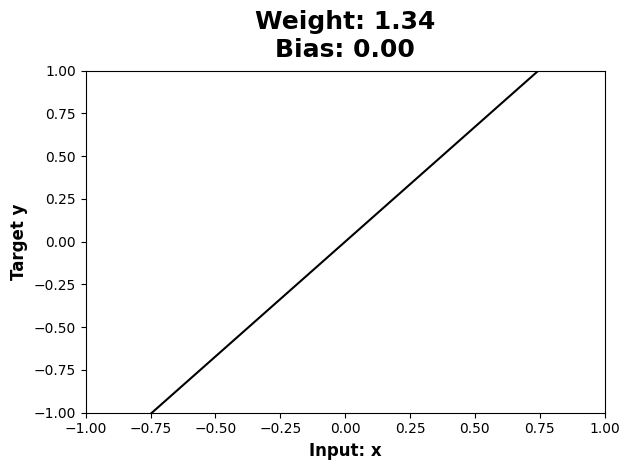

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

# Продолжайте #

Добавляйте скрытые слои и [**делайте свои модели глубокими**](https://www.kaggle.com/ryanholbrook/deep-neural-networks) в Уроке 2.


---




*Есть вопросы или комментарии? Посетите [course discussion forum](https://www.kaggle.com/learn/intro-to-deep-learning/discussion), чтобы пообщаться с другими участниками.*
